# DRUG CLASSIFICATION USING NAIVE BAYES :

In [1]:
# Importing all the required libraries for EDA:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/Users/sukhen/Desktop/CSV_files/Drugs_classification/drug200.csv')

In [3]:
# Seeing the dimensions of the data:
df.shape

(200, 6)

In [4]:
#Seeing the datatypes and total rows of data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


Observation:

* There is no null data present inside our data set.

* Each feature seems to have correct data type.

In [5]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [6]:
# Taking a look of all the columns:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [7]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [8]:
#Checking if any variable has null values:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

Seeing the stats we can say there are no null values in the dataset.

## Univariate analysis variable by variable:

In [9]:
print("Max Age:", df.Age.max())
print("Min Age:", df.Age.min())

Max Age: 74
Min Age: 15


<AxesSubplot:xlabel='Age', ylabel='Density'>

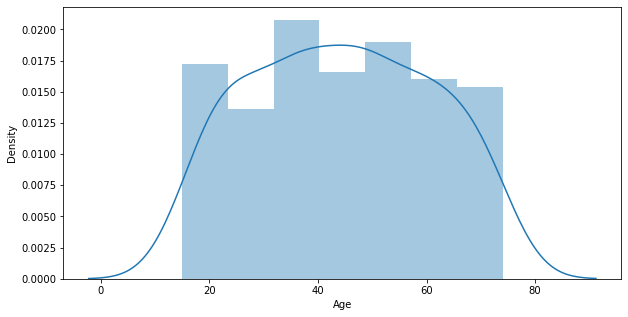

In [10]:
plt.figure(figsize = (10,5))
sns.distplot(df.Age)

The age group is distributed from 15-74 

In [11]:
df.Sex.value_counts()

M    104
F     96
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

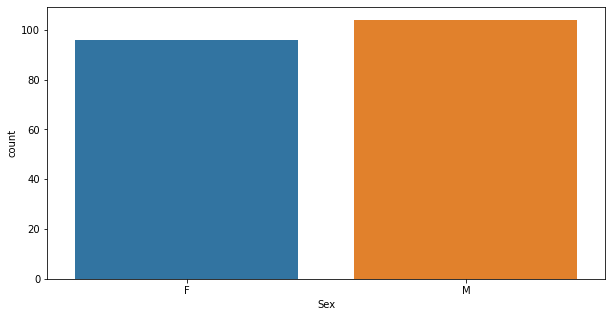

In [44]:
plt.figure(figsize=(10,5))
sns.countplot(df.Sex)

The dataset consists of male records more over female records

In [46]:
df.BP.value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

<AxesSubplot:xlabel='BP', ylabel='count'>

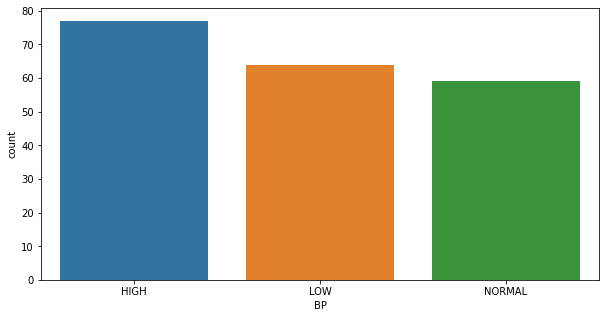

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(df.BP)

The plot shows that High Blood pressure records over other normal patients and also the mean is 66.66%

In [15]:
df.Cholesterol.value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

<AxesSubplot:xlabel='Cholesterol', ylabel='count'>

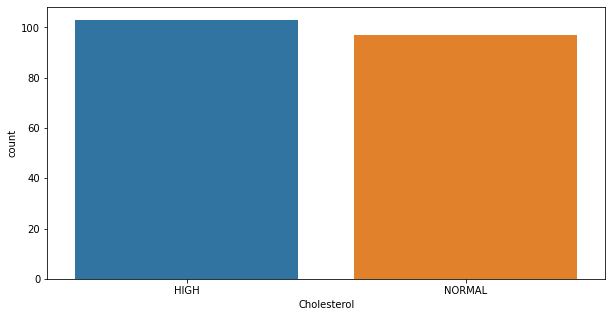

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(df.Cholesterol)

Cholestrol is high over the normal patients 

In [17]:
print('Min of Sodium/Potassium is :',df.Na_to_K.min())
print('Max of Sodium/Potassium is :',df.Na_to_K.max())
print('Mean of Sodium/Potassium is :',df.Na_to_K.mean())
print('Standard Deviation of Sodium/Potassium is :',df.Na_to_K.std())

Min of Sodium/Potassium is : 6.269
Max of Sodium/Potassium is : 38.247
Mean of Sodium/Potassium is : 16.08448499999999
Standard Deviation of Sodium/Potassium is : 7.223955528459517


<AxesSubplot:xlabel='Na_to_K', ylabel='Density'>

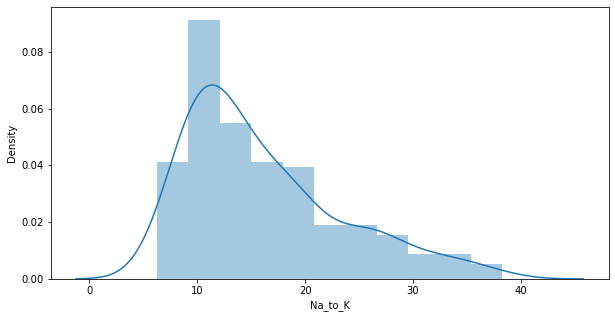

In [18]:
plt.figure(figsize = (10,5))
sns.distplot(df.Na_to_K)

If we see the ratio it starts from 6.2 to 38.2 with a mean of 16.08

In [19]:
df['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugB    16
drugC    16
Name: Drug, dtype: int64

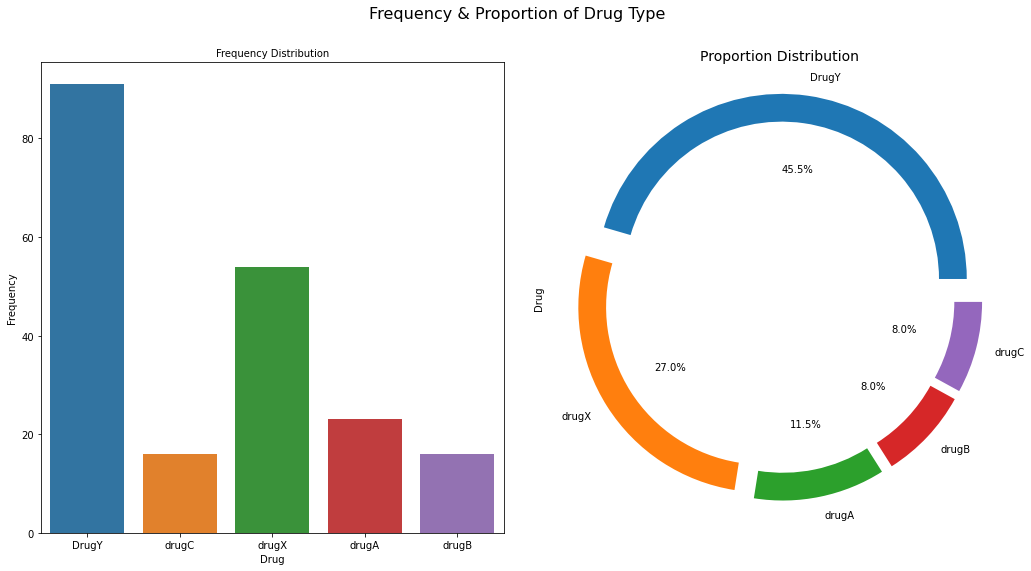

In [20]:
fig = plt.figure(figsize = [15, 8])
plt.subplot(1, 2, 1)
ax = sns.countplot(x = 'Drug', data = df)
plt.xlabel(xlabel = 'Drug', size = 10)
plt.ylabel(ylabel = 'Frequency', size = 10)
plt.title(label = 'Frequency Distribution', size = 10)

plt.subplot(1, 2, 2)
space = np.ones(5)/10
df.Drug.value_counts().plot(kind = 'pie', explode = space, fontsize = 10, autopct = '%3.1f%%', 
                                 wedgeprops = dict(width=0.15), figsize = [15, 8])
plt.title(label = 'Proportion Distribution', size = 14)
plt.tight_layout(pad = 3.0)
plt.suptitle(t = 'Frequency & Proportion of Drug Type', y = 1.02, size = 16)
plt.show()

Observation:
* We can observe class imbalance in our data set.
* Drug Y is prescribed more over to patients than other drugs

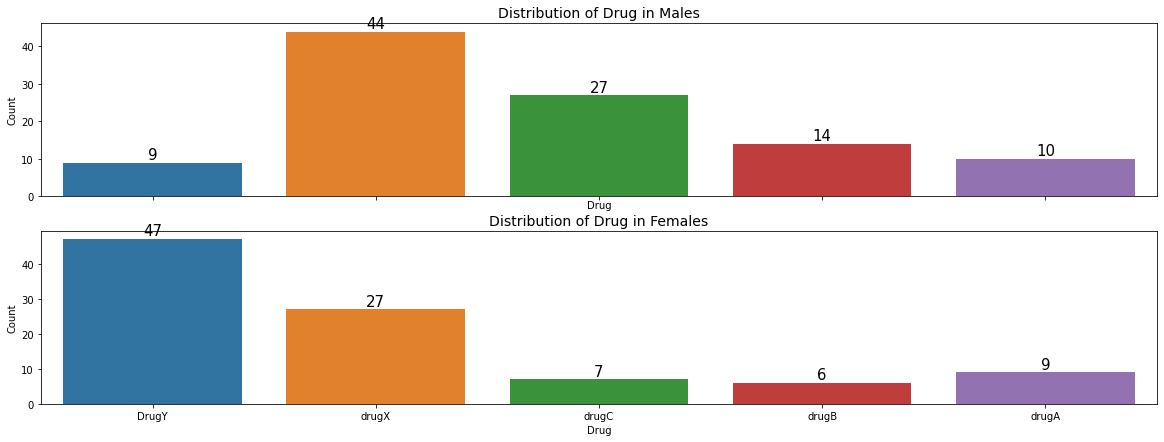

In [21]:
# Plotting the distribution of the sliced data
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, sharex = True, figsize = (20, 7))
ax1 = sns.countplot(df[df.Sex == 'M'].Drug,  ax = ax1)
ax1.set_title(label = 'Distribution of Drug in Males', size = 14)
for bar in ax1.patches:
    ax1.annotate(format(bar.get_height(), '.0f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
                 ha='center', va='center',size=15, xytext=(0, 8),textcoords='offset points')
ax1.set_ylabel(ylabel = 'Count')
ax2 = sns.countplot(df[df.Sex == 'F'].Drug,  ax = ax2)
for bar in ax2.patches:
    ax2.annotate(format(bar.get_height(), '.0f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
                 ha='center', va='center',size=15, xytext=(0, 8),textcoords='offset points')
ax2.set_title(label = 'Distribution of Drug in Females', size = 14)
ax2.set_ylabel(ylabel = 'Count')
plt.show()

Observations :

* Males are being given DrugX the most followed by DrugC while DrugY is the least recommended to Males.

* Females are being given DrugY the most followed by DrugX while DrugB is the least recommended to Females.

In [22]:
# One Hot Encoding ::
df_dummy = pd.get_dummies(df[['Age','Sex','BP','Cholesterol','Na_to_K']],drop_first=True)
df_dummy.head()

,Age,Na_to_K,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
0,23,25.355,0,0,0,0
1,47,13.093,1,1,0,0
2,47,10.114,1,1,0,0
3,28,7.798,0,0,1,0
4,61,18.043,0,1,0,0


### Univariate analysis of the dummy variables:

In [23]:
df_dummy['Sex_M'].value_counts().reset_index()

,index,Sex_M
0,1,104
1,0,96


In [24]:
df_dummy[['BP_LOW','BP_NORMAL']].value_counts().reset_index().rename(columns = {0:'Total'})

,BP_LOW,BP_NORMAL,Total
0,0,0,77
1,1,0,64
2,0,1,59


In [25]:
df_dummy['Cholesterol_NORMAL'].value_counts().reset_index()

,index,Cholesterol_NORMAL
0,0,103
1,1,97


In [26]:
df_dummy['Drug']=df['Drug']

In [27]:
df_dummy.head()

,Age,Na_to_K,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL,Drug
0,23,25.355,0,0,0,0,DrugY
1,47,13.093,1,1,0,0,drugC
2,47,10.114,1,1,0,0,drugC
3,28,7.798,0,0,1,0,drugX
4,61,18.043,0,1,0,0,DrugY


### Modelling:

In [28]:
df_dummy.head()

,Age,Na_to_K,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL,Drug
0,23,25.355,0,0,0,0,DrugY
1,47,13.093,1,1,0,0,drugC
2,47,10.114,1,1,0,0,drugC
3,28,7.798,0,0,1,0,drugX
4,61,18.043,0,1,0,0,DrugY


In [29]:
#Importing all the required libraries for modelling purpose:

from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [30]:
# Defining the X and y variable for modelling:
y = df_dummy['Drug']
X = df_dummy.drop('Drug',axis=1)

In [31]:
X.head()

,Age,Na_to_K,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
0,23,25.355,0,0,0,0
1,47,13.093,1,1,0,0
2,47,10.114,1,1,0,0
3,28,7.798,0,0,1,0
4,61,18.043,0,1,0,0


In [32]:
y.head()

0    DrugY
1    drugC
2    drugC
3    drugX
4    DrugY
Name: Drug, dtype: object

In [33]:
# Dividing the dataset into train_test_split:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=35)

In [34]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(140, 6)
(140,)
(60, 6)
(60,)


In [35]:
# Initializing the model
model = GaussianNB()

In [36]:
# Fit the model to X_train and y_train and also predict x_train
model.fit(X_train,y_train)
train_pred= model.predict(X_train)

In [37]:
# Creating a confusion matrix
confusion_m = metrics.confusion_matrix(y_train,train_pred)
confusion_m

array([[43,  9,  5,  8,  0],
       [ 0, 16,  0,  0,  0],
       [ 0,  0, 11,  0,  0],
       [ 0,  0,  0, 11,  0],
       [ 1,  0,  0,  0, 36]])

In [38]:
# Checking the accuracy score
accuracy = metrics.accuracy_score(y_train,train_pred)
accuracy*100

83.57142857142857

In [39]:
# Predict using test data
test_pred = model.predict(X_test)

In [40]:
# Creating a confusion matrix
confusion_m = metrics.confusion_matrix(y_test,test_pred)
confusion_m

array([[16,  4,  2,  4,  0],
       [ 0,  7,  0,  0,  0],
       [ 0,  0,  5,  0,  0],
       [ 0,  0,  0,  5,  0],
       [ 0,  0,  0,  0, 17]])

In [41]:
# Checking the accuracy score
accuracy = metrics.accuracy_score(y_test,test_pred)
accuracy*100

83.33333333333334

We have got over 83.3% accuracy_score on our test data, which is quiet less,
To improve the score we can try different techniques and other algorithms

In [47]:
# Checking the classification report
classification_report = metrics.classification_report(y_test,test_pred)
print(classification_report)

              precision    recall  f1-score   support

       DrugY       1.00      0.62      0.76        26
       drugA       0.64      1.00      0.78         7
       drugB       0.71      1.00      0.83         5
       drugC       0.56      1.00      0.71         5
       drugX       1.00      1.00      1.00        17

    accuracy                           0.83        60
   macro avg       0.78      0.92      0.82        60
weighted avg       0.90      0.83      0.83        60



In [48]:
# Listing our findings with the test data
list(zip(y_test,test_pred))[0:20]

[('drugB', 'drugB'),
 ('DrugY', 'DrugY'),
 ('DrugY', 'DrugY'),
 ('drugB', 'drugB'),
 ('DrugY', 'DrugY'),
 ('DrugY', 'drugA'),
 ('DrugY', 'DrugY'),
 ('DrugY', 'drugA'),
 ('drugX', 'drugX'),
 ('DrugY', 'drugC'),
 ('DrugY', 'DrugY'),
 ('drugX', 'drugX'),
 ('DrugY', 'DrugY'),
 ('drugC', 'drugC'),
 ('drugX', 'drugX'),
 ('drugC', 'drugC'),
 ('DrugY', 'drugC'),
 ('DrugY', 'drugA'),
 ('DrugY', 'DrugY'),
 ('drugA', 'drugA')]

### Thank you !! please upvote if you liked the code and the simplicity of it 